# HUDF RGB Composite (f160w / f125w / f105w)

In this notebook, I create a 3-color RGB image of the Hubble Ultra Deep Field using:

- **Red  = f160w**
- **Green = f125w**
- **Blue = f105w**

I will:

1. Load the three HUDF FITS images  
2. Normalize each band to enhance contrast  
3. Stack them into an RGB array  
4. Display the composite image  
5. Save the result as a PNG

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import warnings
warnings.filterwarnings("ignore")

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = [12., 12.]

## Loading the Three HUDF Filters

I load each drizzled HUDF image using `fits.getdata()` and convert to float32.

In [5]:
f160 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits").astype(np.float32)
f125 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits").astype(np.float32)
f105 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits").astype(np.float32)

f160.shape, f125.shape, f105.shape

((3600, 3600), (3600, 3600), (3600, 3600))

## Normalizing the Images

Hubble images span a wide range of brightness.  
To make a color composite, I normalize each band by:

1. Subtracting the minimum  
2. Dividing by a percentile-based stretch  

This keeps faint galaxies visible while preventing bright objects from saturating.

In [6]:
def normalize(img, lower=1, upper=99):
    """Normalize image using percentile stretching."""
    lo, hi = np.percentile(img, (lower, upper))
    img = np.clip((img - lo) / (hi - lo), 0, 1)
    return img

R = normalize(f160)
G = normalize(f125)
B = normalize(f105)

## Creating the RGB Array

Here I stack the normalized images into an RGB array in the order:

- R = f160w
- G = f125w
- B = f105w

In [7]:
rgb = np.dstack((R, G, B))
rgb.shape

(3600, 3600, 3)

## Displaying the RGB Composite

Now I plot the 3-color HUDF image.

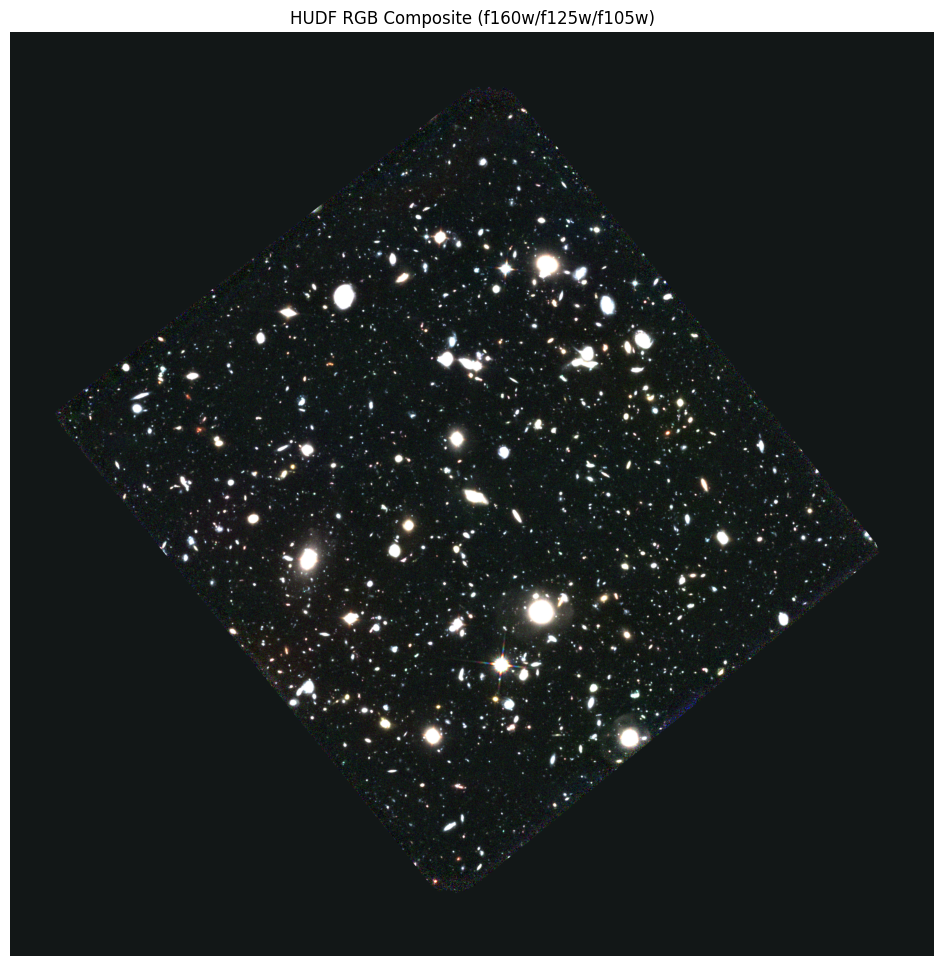

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(rgb, origin="lower")
plt.title("HUDF RGB Composite (f160w/f125w/f105w)")
plt.axis("off")

plt.savefig("HUDF_RGB_composite.png", dpi=200, bbox_inches="tight")
plt.show()